In [1]:
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt

import cv2 as cv

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# normalize our data to make it easier to handle
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [5]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten( input_shape =( 28 , 28 )))
model.add(tf.keras.layers.Dense( units = 128 , activation = 'relu' ))
model.add(tf.keras.layers.Dense( units = 128 , activation = 'relu' ))
model.add(tf.keras.layers.Dense( units = 10 , activation =tf.nn.softmax))
model.compile( optimizer = 'adam' ,loss = 'sparse_categorical_crossentropy' , metrics =[ 'accuracy' ])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(X_train, Y_train, epochs = 3 )

Train on 60000 samples
Epoch 1/3
26624/60000 [============>.................] - ETA: 1:00:14 - loss: 2.3254 - accuracy: 0.125 - ETA: 31:05 - loss: 2.3141 - accuracy: 0.1250  - ETA: 5:46 - loss: 2.2047 - accuracy: 0.352 - ETA: 2:18 - loss: 1.9444 - accuracy: 0.49 - ETA: 1:23 - loss: 1.6051 - accuracy: 0.59 - ETA: 1:05 - loss: 1.4079 - accuracy: 0.63 - ETA: 51s - loss: 1.2188 - accuracy: 0.6855 - ETA: 43s - loss: 1.0911 - accuracy: 0.716 - ETA: 37s - loss: 0.9998 - accuracy: 0.738 - ETA: 32s - loss: 0.9209 - accuracy: 0.757 - ETA: 29s - loss: 0.8550 - accuracy: 0.772 - ETA: 26s - loss: 0.8076 - accuracy: 0.783 - ETA: 24s - loss: 0.7771 - accuracy: 0.790 - ETA: 22s - loss: 0.7433 - accuracy: 0.799 - ETA: 20s - loss: 0.7190 - accuracy: 0.805 - ETA: 19s - loss: 0.6934 - accuracy: 0.812 - ETA: 18s - loss: 0.6629 - accuracy: 0.820 - ETA: 17s - loss: 0.6422 - accuracy: 0.825 - ETA: 16s - loss: 0.6203 - accuracy: 0.830 - ETA: 15s - loss: 0.6042 - accuracy: 0.834 - ETA: 14s - loss: 0.5874 - accu

limit_output extension: Maximum message size of 10000 exceeded with 10038 characters

In [9]:
loss, accuracy = model.evaluate(X_test, Y_test)

10000/10000 [==============================] - ETA: 31s - loss: 0.0631 - accuracy: 0.968 - ETA: 1s - loss: 0.1013 - accuracy: 0.964 - ETA: 0s - loss: 0.1075 - accuracy: 0.96 - ETA: 0s - loss: 0.1062 - accuracy: 0.96 - ETA: 0s - loss: 0.1075 - accuracy: 0.96 - ETA: 0s - loss: 0.0983 - accuracy: 0.96 - ETA: 0s - loss: 0.0862 - accuracy: 0.97 - ETA: 0s - loss: 0.0798 - accuracy: 0.97 - 1s 52us/sample - loss: 0.0811 - accuracy: 0.9745


In [10]:
print ( 'Loss: ' , loss)
print ( 'Accuracy: ' , accuracy)

Loss:  0.08114482965152711
Accuracy:  0.9745


In [11]:
model.save("modeldir\digits.model")


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: modeldir\digits.model\assets


In [12]:

model = tf.keras.models.load_model('modeldir\digits.model')

In [40]:
image = cv.imread("image/digit1.png")[:,:,0]
image = np.invert(np.array([image]))


In [41]:
prediction = model.predict(image)
print ( "Prediction: {}" .format(np.argmax(prediction)))

Prediction: 6


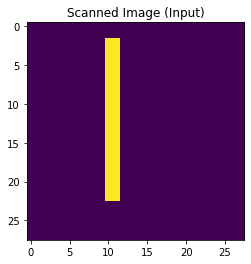

In [42]:
plt.imshow(image[0])
plt.title("Scanned Image (Input)")
plt.show()